<img align="left" width="30%" style="padding-right:10px;" src="Images/Ccom.png">

___
# Review of Linear Algebra
## 4 Linear Transformations
<br>
Original Linear Algebra text and in text examples:
David E. Wells, Kresho Frankich, 1994

Minor additional notes and edits: Semme J. Dijkstra, 2022<br>
Additional examples: : Semme J. Dijkstra, 2022<br>
Jupyter Notebook Implementation: Semme J. Dijkstra, 2022<br>
Python code and explanations: Semme J. Dijkstra, 2022

<a href="https://teams.microsoft.com/l/team/19%3auL2OnH3RSfCWwU2Fd3VYGLT_03BYOfA3KB_OBp10CIY1%40thread.tacv2/conversations?groupId=5c11a428-14b6-429d-b7f5-a61ebc0a440b&tenantId=d6241893-512d-46dc-8d2b-be47e25f5666"><img src="Images/help.png"  title="Ask questions on Teams" align="right" width="10%" alt="Teams.com\"></a><br><br> 

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sin, cos, sqrt
import numpy.linalg as la
from my_code.latex_output import display_matrix
from my_code.boat import boat
%matplotlib notebook
from matplotlib.animation import FuncAnimation
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


___
<img align="left" width="6%" style="padding-right:10px;" src="./Images/info.png">

# LaTex<br>

This is a [Jupyter](https://jupyter.org/) notebook in which heavy use of [LaTex](https://www.latex-project.org/) is made. LaTex is *\"a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents.\"* according to [the Latex project](https://www.latex-project.org/)

Latex allows the creation of macros and other type-setting methods of convenience. This particular Markdown cell you are reading is used for the definition of new LaTex operators and commands, but they are hidden from view. If you are interested: double click on this cell to enter its edit mode and you will be able see how they are implemented.

<div hidden>
$\usepackage{amsmath,amssymb}$

$\DeclareRobustCommand{\bbone}{\text{\usefont{U}{bbold}{m}{n}1}}$

$\DeclareMathOperator{\EX}{\mathbb{E}}% expected value$

$\DeclareMathOperator{\res}{\vec{r}}$

$\DeclareMathOperator{\mf}{\mu_{1}\sigma_{2}^{2}+\mu_{2}\sigma_{1}^{2}\over{\sigma_{1}^{2} + \sigma_{2}^{2}}}$
    
$\DeclareMathOperator{\sf}{{\sigma_{1}^{2}\sigma_{2}^{2}}\over{\sigma_{1}^{2}+\sigma_{2}^{2}}}$
    
$\newcommand{\ex}[1]{\mathbb{E}\{#1\}}$
    
$\newcommand{\dev}[1]{\mathbb{E}\{#1^o_i - \mathbb{E}\{#1\}\}}$
    
$\newcommand{\cov}[1]{\mathbb{E}\{(#1^o_i - \mathbb{E}\{#1\})(#1 - \mathbb{E}\{#1\})^T\}}$
    
$\newcommand{\m}[1]{\mathbf{#1}}$

$\newcommand{\col}[2]{\begin{pmatrix}#1 \\ #2 \end{pmatrix}}$
    
</div>

___
# 4 Linear Transformations

So-far we have mostly looked at vectors from an algebraic point of view, treating them as rows of columns of real numbers. From the geometric point of view we are familiar with the concept of a vector in two or three dimensions as a ***directed line segment***. We can describe such vectors in algebraic language by specifying the components with respect to some ***reference frame*** defined by a ***coordinate system***, which leads to a row (or column) of two or three real numbers, as before. We know that such vectors can also be uniquely defined by specifying their ***length*** and ***direction***.

We can generalize these geometric ideas and interpret a row or column of $n \in \mathbb{N}^+$ real numbers as a vector in the same sense as in two or three dimensions. The problem is that if $n>3$ we can no longer draw a picture of the vector. However, all the properties of the $2$D or $3$D vectors can be maintained for $n$-dimensional vectors.

For example: the ***length*** of a vector:

$$\lVert x\lVert=\sqrt{\m{x}^T\m{x}}\tag{124}$$

which leads to:

$$\lVert x\lVert=\sqrt{\sum_{i=1}^n}x_i^2\tag{125}$$

and the ***orientation*** of a vector (as represented by its vector of ***direction cosines***)

$$\m{u}_x = \dfrac{\m{x}}{\lVert x\lVert}\tag{126}$$

Note that the ***direction cosines*** are the cosines of the angles that the directed line segment makes which each of the axes of the reference frame respectively.

For any two vectors having the same number of elements, the ***scalar*** product between them is

$$\m{x}^T\m{y} = \m{y}^T\m{x} =\sqrt{\sum_{i=1}^n}x_i y_i\tag{127}$$

The ***distance*** between the end-points of the two vectors is:

$$\lVert x-y\lVert = \sqrt{\sum_{i=1}^n}(x_i-y_i)^2\tag{128}$$

and the ***angle*** in the plane subtended between the two vectors is (from the cosine rule):

$$\cos\theta=\dfrac{\m{x}^T\m{y}}{\lVert x\lVert\lVert y\lVert}\tag{129}$$

The matrix equation:
<a id='eq130'></a>
$$\m{y} = \m{Ax}+\m{b}\tag{130}$$

where $\m{A}$ is a matrix, can be regarded as a ***linear transformation*** of $\m{x}$, in which the matrix $\m{A}$ is called the ***transformation matrix*** and $\m{b}$ is the ***translation vector***. There are two related interpretations of such transformations:

- $\m{x}$ and $\m{y}$ are different vectors whose elements are referred to the same reference frame<br>
    The transformation matrix describes the coordinates of $\m{y}$ in terms of the coordinates of $\m{x}$, or the operations that must be performed on  $\m{x}$ to transform it into $\m{y}$
<br><br>
- $\m{x}$ and $\m{y}$ are the same vector whose elements are referred to different reference frames<br>
    The transformation matrix describes the relationship between the reference frames, or the operations that must be performed on the coordinate system to which $\m{x}$ refers to transform it into the coordinate system to which $\m{y}$ refers

___
## 4.0 Introduction to Transforms and Python

Note that `matplotlib` has a `transforms` module that implement most commonly used linear transforms in an efficient manner. Since this module is specifically aimed at learning about the transforms we will often not use the `matplotlib` functionality, but rather implement them ourselves. Even more efficiency than using `matplotlib` may be gained by using code that specifically makes use of your GPU, this may be done with modules such as `pygame` and can gain you significant performance benefits if so required. One of the goals of these notebooks is then to give you the foundations required to understand the functionality of such highly optimized transformation algorithms.

Before we go much further let's look at the code example below. For this code example we will define $n$ vertices $\m{v}_i,i\in \mathopen[0\dots n\mathclose)$ representing a simple boat shape and capture them as a polygon in matrix $\m{B}$ represented by variable B:

$$\m{v}_1=\col{-6}{-2}, \m{v}_2=\col{4}{-2}, \m{v}_3=\col{6}{0}, \m{v}_4=\col{4}{2}, \m{v}_5=\col{-6}{2}$$

$$\m{B} = \left(\begin{array}{c|c|c|c|c}\m{v}_1&\m{v}_2&\m{v}_3&\m{v}_4&\m{v}_5\end{array}\right) = \begin{pmatrix} -6&4&6&4&-6\\ -2&-2&0&2&2\end{pmatrix}$$

Matrix B holds a polygon defining a boat shape


<IPython.core.display.Math object>

<IPython.core.display.Javascript object>


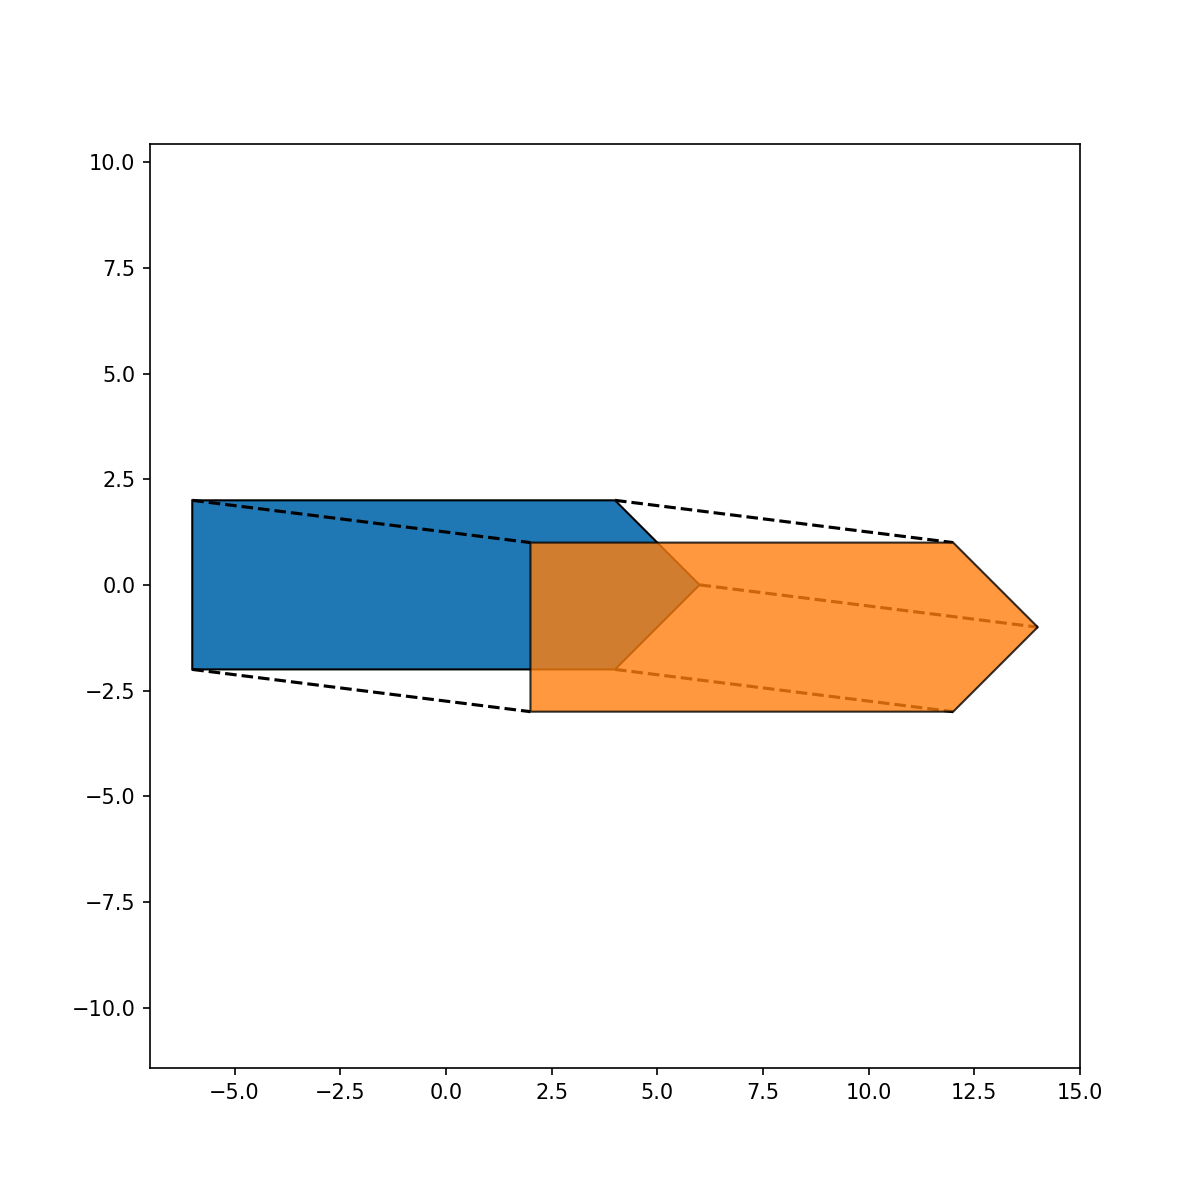

In [78]:
B = np.asarray([[-6, 4, 6, 4, -6],[-2, -2, 0, 2, 2]])
t =  np.asarray([[8],[-1]])
Bt = B + t
print('Matrix B holds a polygon defining a boat shape')
display_matrix(B)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(B[0,:],B[1,:],'C0', ec='k',zorder=0)
for i in range(B.shape[1]):
    plt.plot([B[0,i], Bt[0,i]],[B[1,i],Bt[1,i]],'k--',zorder=1)
    
plt.fill(Bt[0,:],Bt[1,:],'C1', ec='k', alpha=.8,zorder=2)
plt.show()

What all happened here?

    B = np.asarray([[-6, 4, 6, 4, -6],[-2, -2, 0, 2, 2]])
    
Creates a `numpy` array defining the matrix $\m{B}$ that holds a polygon of vertices in the form of the top view of a, admittedly, simple boat (shown in blue in the plot). Note that it would be more 'pythonesque' to name the matrix `B` `boat` instead, as it is more descriptive. However, since the purpose here is to illuminate principles of linear algebra we will follow the common usage of using a single capital letter, possibly augmented by a lower case specifier, as the name of a matrix. The vertices of the matrix are then given by the columns of matrix `B`, where the row 0 element defines the 0-axis (horizontal) position, and the row 1 element defines the 1-axis (vertical) position.

    t =  np.asarray([[8],[-1]])
    
Creates a column vector with the elements `8` and `-1`

    Bt = B + t
    
This is the statement that really warrants the step-by-step explanation; what happens here is not part of traditional linear algebra, but is a very useful addition for when you program - the process is called **implicit expansion** and allows you to write cleaner looking code. In linear algebra there is a mismatch in dimensions in the expression written above; Python recognizes this and replaces the vector $\m{t}$ represented by the variable `t` by the matrix $[\m{t, t, ... t}]$ matching the number of columns in `B` and thus resulting in the addition of the vector `t` to every vertex contained within `B`. Thus matrix `Bt` is matrix `B` transformed by pure translation vector `t` (you'll learn what a pure translation is next).

    print('Matrix B holds a polygon defining a boat shape')
    display_matrix(B)

This just lets the user know the numerical contents of `B` in an appropriate format using LaTeX.

    plt.figure(figsize=(8, 8))

This creates the plot canvas

    plt.axis('equal')
    
This equals the scaling of the units on the plot axes (1 unit on the 0-axis matches in size to 1 unit on the 1-axis).

    plt.fill(B[0,:],B[1,:],'C0', ec='k',zorder=0)
    
This plots the matrix `B` as a filled polygon, using row 0 elements for the 0-axis coordinates, row 1 elements for the 1-axis, the first color in the color cycle C0, a black outline 'k', and puts the `zorder` at 0 i.e., in the background.

    for i in range(B.shape[1]):
        plt.plot([B[0,i], Bt[0,i]],[B[1,i],Bt[1,i]],'k--',zorder=1)
        
This plots black dotted connecting lines from all polygon vertices `i` contained in B to its transformed vertices in `Bt`. Since `zorder=1` the vertices are drawn over the previously drawn polygon.

    plt.fill(Bt[0,:],Bt[1,:], alpha=.8,zorder=2)
    
This plots the transformed matrix `Bt` in the second color in the color cycle (C1), and a black outline ('k') over all previously drawn shapes. Those still are visible because the polygon is made transparent by setting the value `alpha=.8`

    plt.show()
    
This forces the plot to be shown on the screen.

### 4.0 Self study exercise 1

    a) Add at least 4 vertices to the boat matrix B
    b) Create a different vector t
    c) Perform a pure translation of B using t
    
In the mycode folder you will find the file plottransform.py containing the function `plottransform` that takes the arguments B and Bt.

    d) Update function plottransform so that it reproduces the plot produced by the code cell above (hint, a simple copy and paste operation should achieve your goal)

<IPython.core.display.Javascript object>


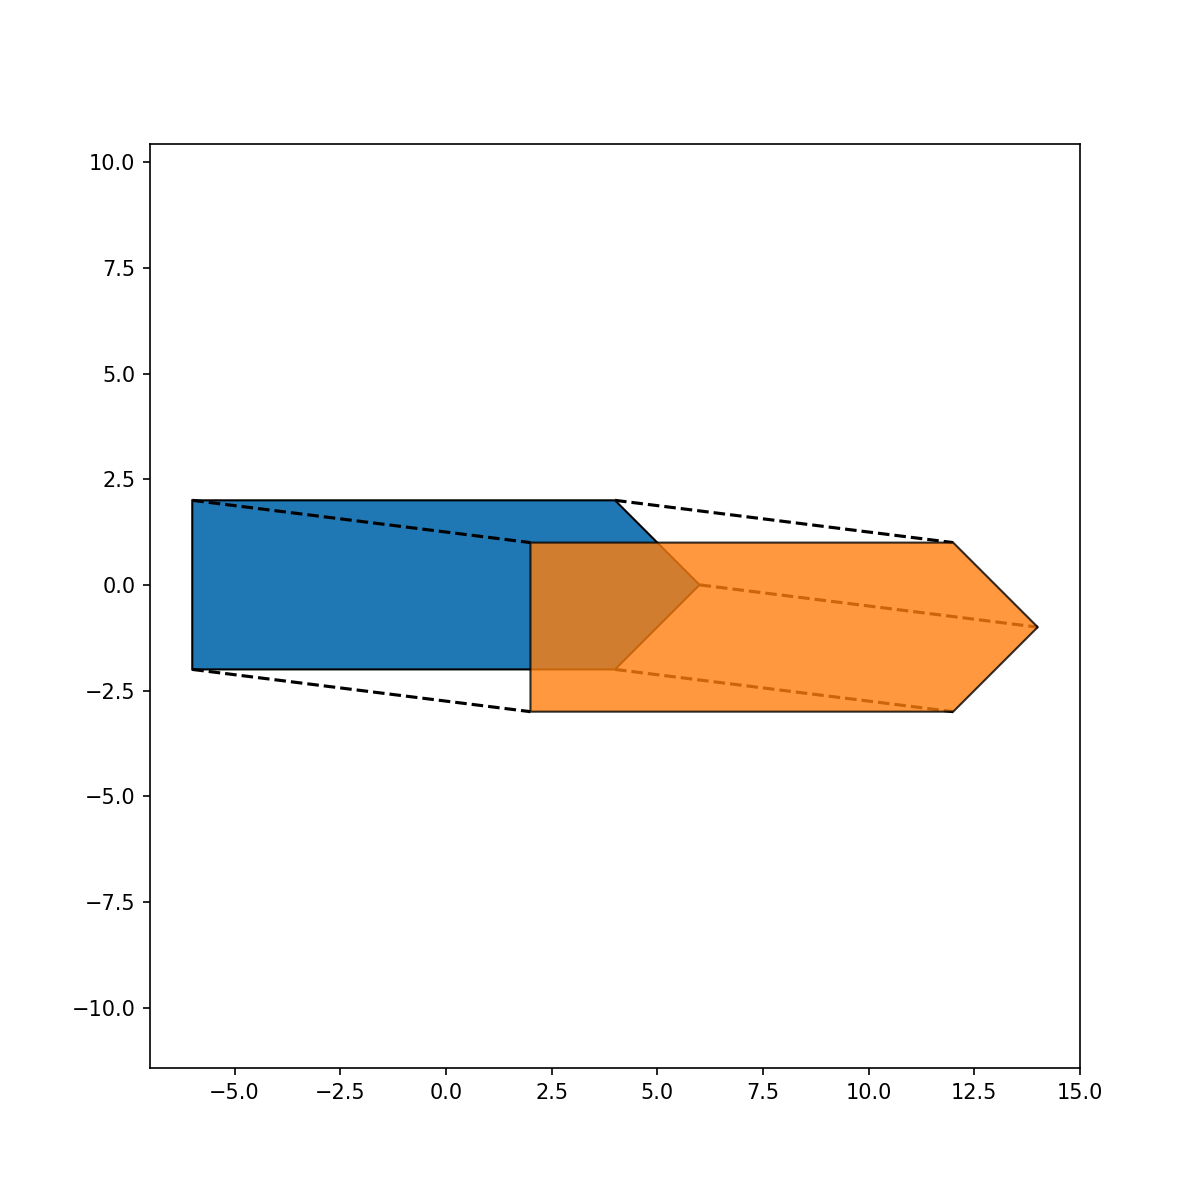

In [79]:
### 4.0 Self study exercise 1

B = np.asarray([[-6, 4, 6, 4, -6],[-2, -2, 0, 2, 2]])
t =  np.asarray([[8],[-1]])
Bt = B + t
fg = plt.figure(figsize=(8, 8));
plottransform(B,Bt)
plt.show()

___
## 4.1 Special (Affine) Transformations

In this section we restrict our attention to matrices that are square and nonsingular ($\text{det}\left(\m{A}\right)\neq 0$) in which case the inverse $\m{A}^{-1}$ exists, so that:

$$\m{x}=\m{A}^{-1}\left(\m{y}-\m{b}\right)\tag{131}$$

This restricted class of linear transformations are called ***affine transformations*** which have as a property that they may be inverted to obtain the original vector $\m{x}$. There are six kinds of ***elementary affine transformations***. Any general affine transformation can be factored into a sequence of these elementary transformations. Note that there is one special affine transformation for which $\m{A} = \m{I}$ which is known as:

    pure translation
    
for all others $\m{b} = \m{0}$ thus, these are known as ***homogeneous affine transformations*** and are called: 

    rotation
    reflection
    scalar transformation
    simple elongation
    simple shear

We will look at all these individually.

___
<a id='4_1_2_Pure_Translation'></a>
### 4.1.1 Elementary Affine Transformations: Pure Translation

The only non-homogeneous elementary affine transformation is ***pure translation*** w

$$\m{y} = \m{x}+\m{b}\tag{132}$$

for which, in [(130)](#eq130)

$$\m{A} = \m{I}\tag{133}$$

An example is:

$$_2t_1=\begin{pmatrix} 8 \\ -1 \end{pmatrix}\tag{134}$$

translating

$$_2x_1=\begin{pmatrix} 4 \\ 1 \end{pmatrix}\tag{135}$$

by $\m{t}$ gives:

$$\m{y}= \m{x}+\m{t}=\begin{pmatrix} 12 \\ 0 \end{pmatrix}\tag{136}$$

<img align="left" width="30%" style="padding-right:10px;" src="Images/pure_translation.png">

<br><br>Translating all vertices of the boat $\begin{pmatrix}-6\\-2\end{pmatrix}$,$\begin{pmatrix}4\\-2\end{pmatrix}$,$\begin{pmatrix}6\\0\end{pmatrix}$,$\begin{pmatrix}4\\2\end{pmatrix}$,$\begin{pmatrix}-6\\2\end{pmatrix}$ produces the result shown in the figure to the left


___
#### 4.1.1 Self Study Exercise 1

We will illustrate the elementary affine transforms using figures. In this exercise we will aim to reproduce the figure above. To this end we will update the `plottransform()` function you created to take an additional argument named `plot_title` with a default value of an empty string i.e., `plot_title = ''`. We will use this argument to plot an appropriate title.

    a) Add the `plot_title = ''` argument to the function declaration of `plottransform()`
    b) Update the `plottransform` code so that it will plot the title using `plt.title()`
    c) Create a matrix of vertices called `X` and assign it the vertices returned by the `boat()`
    d) Define the translation vector `t` according to (134)
    e) Transform `X` to `Xt` using the pure translation given by `t`
    f) create a 8x8 figure `fg` using the `plt.figure()` function 
    g) Plot `X` and its transform `Xt` with the title 'Pure Translation' using `plottransform()`
    h) Verify that your plot corresponds to the figure above
    

<IPython.core.display.Javascript object>


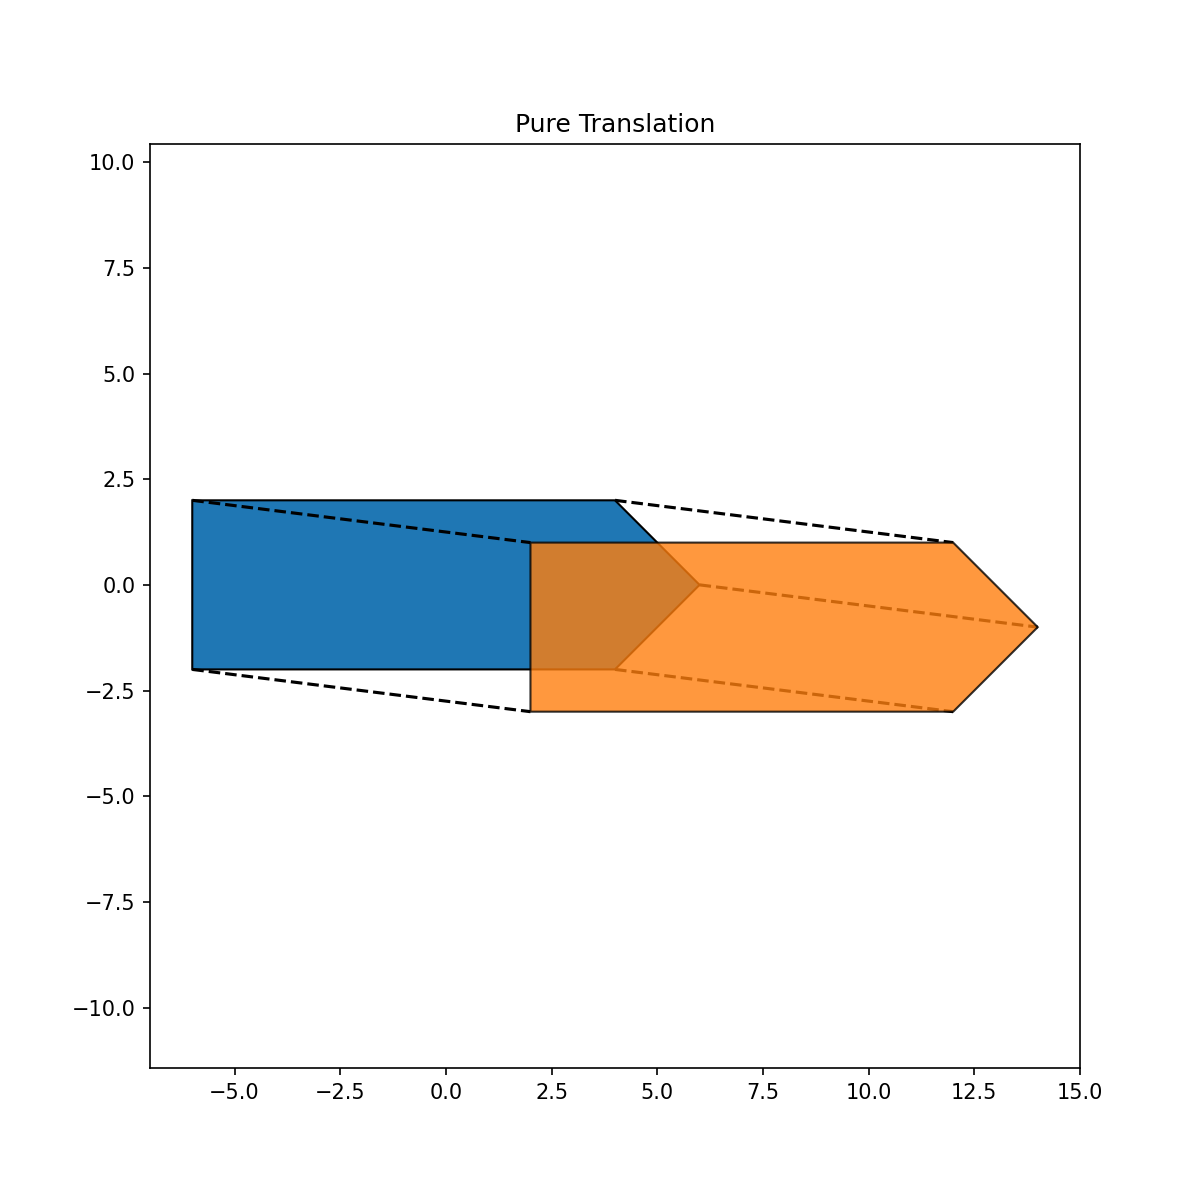

In [80]:
X = boat()
t =  np.asarray([[8],[-1]])
Xt = X + t
fg = plt.figure(figsize=(8, 8));
plottransform(X,Xt,'Pure Translation')
plt.show()

___
<a id='Rotation'></a>
### 4.1.2 Special Transformations: Rotation and Reflection

***Rotations*** and ***Reflections*** leave the length of a vector unchanged, hence the length of the square of a vector also remains unchanged. Thus given a transformation (rotation or reflection) matrix $\m{A}$, for any arbitrary $\m{x}$ we will obtain the transformed (rotated or reflected vector)

$$\m{y} = \m{Ax}\tag{137}$$ 

such that

$$\m{y}^T\m{y} = \m{x}^T\m{x}\tag{138}$$

or

$$\m{y}^T\m{y} = \left(\m{Ax}\right)^T\m{Ax}=\m{x}^T\left(\m{A}^T\m{A}\right)\m{x}=\m{x}^T\m{x}\tag{139}$$

Therefore

$$\m{A}^T\m{A}=\m{I}\tag{140}$$

That is, the transformation matrix must be ***orthogonal***. Rotation matrices are ***proper*** orthogonal matrices i.e, 

$$\text{det}\left(\m{A}\right)=+1\tag{141}$$

Reflection matrices are ***improper*** orthogonal matrices i.e, 

$$\text{det}\left(\m{A}\right)=-1\tag{142}$$

Any improper matrix can be expressed  as the product of a rotation and a reflection. The inverse of a rotation is its transpose, the inverse of a reflection is itself.

An example of a rotation matrix is:

$$_2\m{R}_2=\begin{pmatrix}\cos 30^o & \sin 30^o \\ -\sin 30^o & \cos 30^o\end{pmatrix}\tag{143}$$

Transforming

$$\m{x}=\begin{pmatrix}4\\1\end{pmatrix}\tag{144}$$

by $\m{R}$ gives:

$$\m{y}=\m{Rx}=\begin{pmatrix}3.96\\-1.13\end{pmatrix}\tag{145}$$


<img align="left" width="30%" style="padding-right:10px;" src="Images/rotation.png">

<br><br>Rotating all vertices of the boat $\begin{pmatrix}-6\\-2\end{pmatrix}$,$\begin{pmatrix}4\\-2\end{pmatrix}$,$\begin{pmatrix}6\\0\end{pmatrix}$,$\begin{pmatrix}4\\2\end{pmatrix}$,$\begin{pmatrix}-6\\2\end{pmatrix}$ by $\m{R}$ produces the result shown in the figure to the left

___
#### 4.1.2 Self Study Exercise 1

Similar to how you reproduced the pure translation figure, reproduce the rotation figure shown above 

    a) Create a matrix of vertices called `X` and assign it the vertices returned by the `boat()`\
    b) Define the rotation angle `th` as pi/6 radians (we use radians)
    c) Define the rotation matrix `R` according to (143), using angle th 
    d) Transform `X` to `Xt` using the rotation defined by `R`
    e) create a 8x8 figure `fg` using the `plt.figure()` function 
    f) Plot `X` and its transform `Xt` with the title 'Rotation' using `plottransform()`
    g) Verify that your plot corresponds to the figure above
    h) Is this rotation in the direction that you expected?
    

<IPython.core.display.Javascript object>


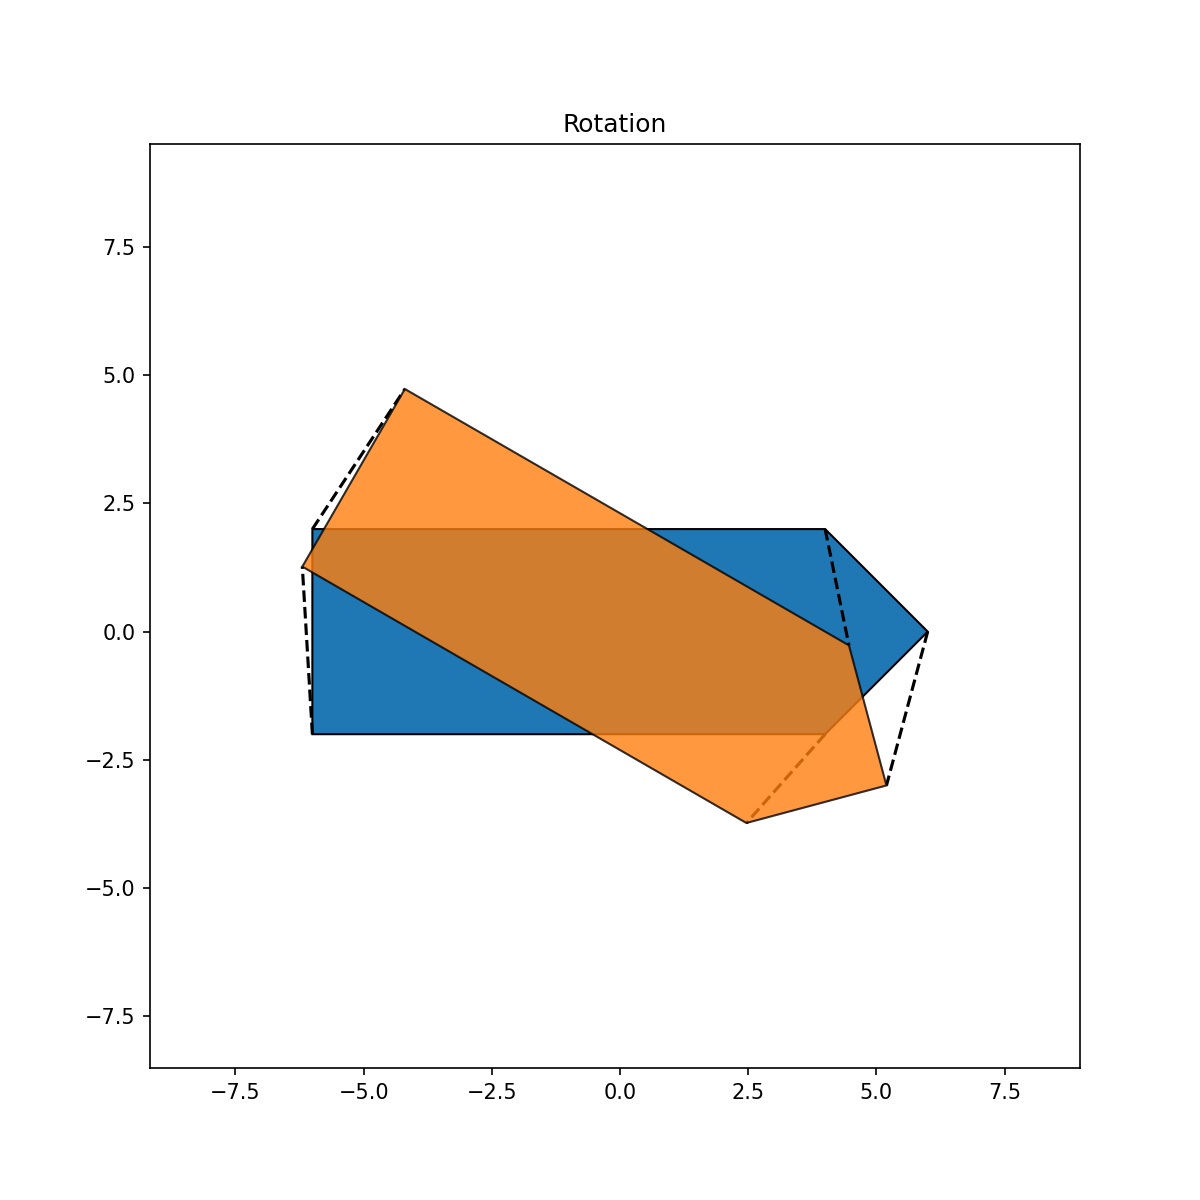

In [81]:
X = boat()
th = pi/6
R = np.asarray([[cos(th), sin(th)],[-sin(th),cos(th)]])
Xt = R@X
fg = plt.figure(figsize=(8, 8))
plottransform(X,Xt,'Rotation')
plt.show()

q_4_1_2_1_h = 'I expected that a positive rotation would rotate the boat in clockwise/anticlockwise direction'

___

An example of a reflection matrix is:

$$_2\m{F}_2 = \begin{pmatrix}-1&0\\0&-\end{pmatrix}\tag{146}$$

Transforming

$$\m{x} = \begin{pmatrix}4\\1\end{pmatrix}\tag{147}$$

by $\m{F}$ gives

$$\m{y} = \m{Fx}=\begin{pmatrix}-4\\1\end{pmatrix}\tag{148}$$

<img align="left" width="30%" style="padding-right:10px;" src="Images/reflection.png">

<br><br>Reflecting all vertices of the boat $\begin{pmatrix}-6\\-2\end{pmatrix}$,$\begin{pmatrix}4\\-2\end{pmatrix}$,$\begin{pmatrix}6\\0\end{pmatrix}$,$\begin{pmatrix}4\\2\end{pmatrix}$,$\begin{pmatrix}-6\\2\end{pmatrix}$ by $\m{F}$ produces the result shown in the figure to the left

___
#### 4.1.2 Self Study Exercise 2

Similar to how you reproduced the Rotation figure, reproduce the Reflection figure shown above 

    a) Create a matrix of vertices called `X` and assign it the vertices returned by the `boat()`\
    b) Define the reflection matrix `F` according to (146)
    c) Transform `X` to `Xt` using the reflection defined by `F`
    d) create a 8x8 figure `fg` using the `plt.figure()` function 
    e) Plot `X` and its transform `Xt` with the title 'Reflection' using `plottransform()`
    f) Verify that your plot corresponds to the figure above
    

<IPython.core.display.Javascript object>


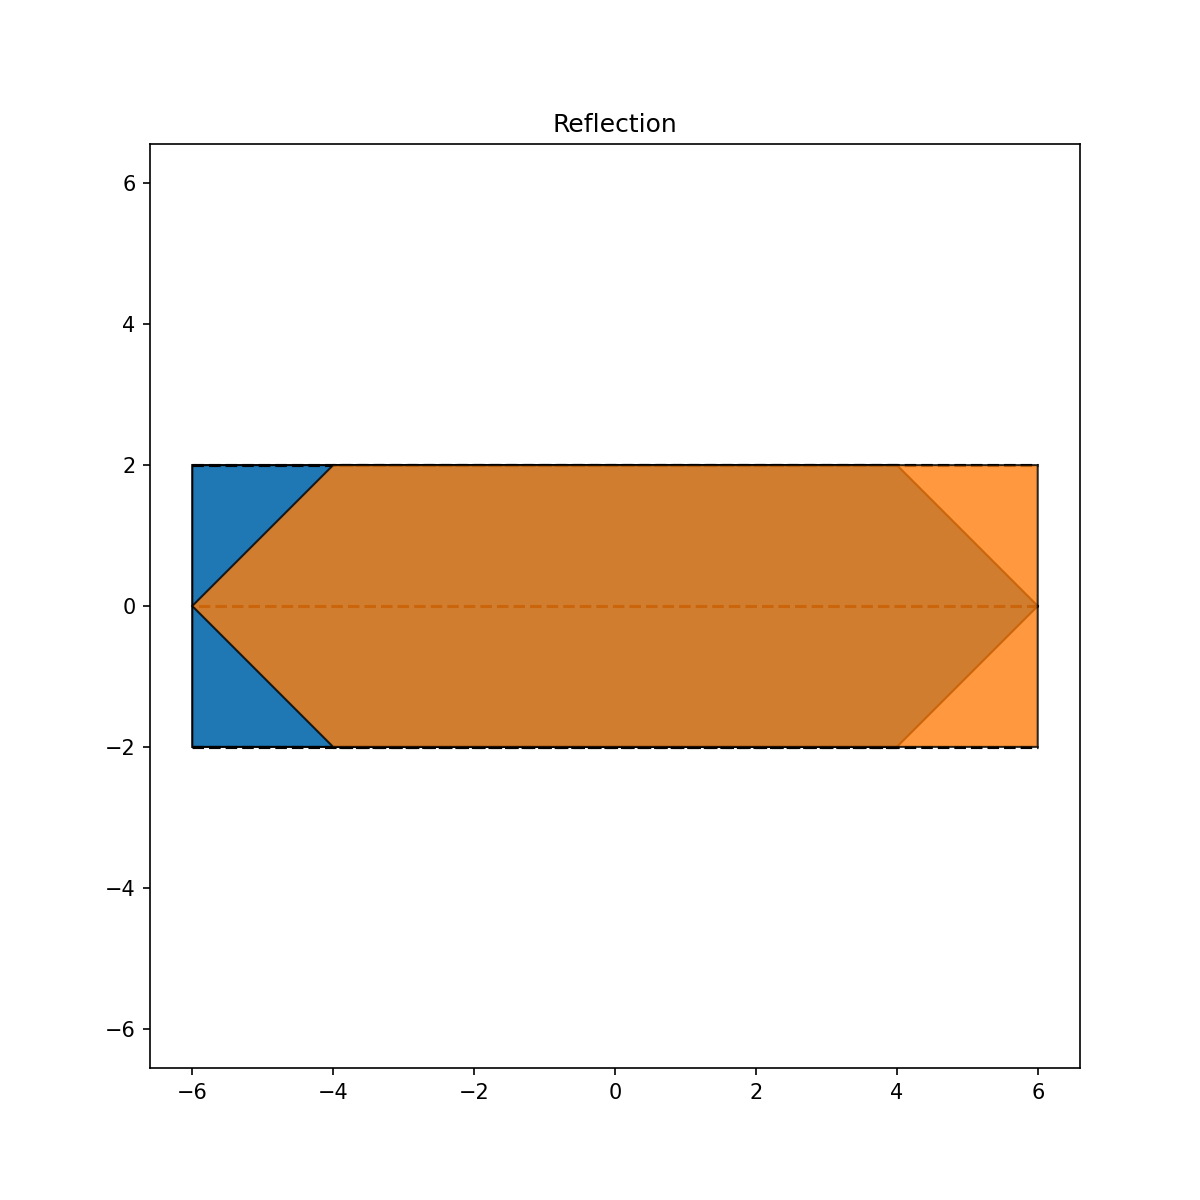

In [82]:
X = boat()
F = np.asarray([[-1,0],[0,1]])
Xt = F@X
fg = plt.figure(figsize=(8, 8))
plottransform(X,Xt,'Reflection')
plt.show()


___
<a id='Scalar_Transformation'></a>
### 4.1.3 Scalar Transformation

A scalar transformation leaves the direction of a vector unchanged, hence can only change vector lengths. This transformation produces the same change in length (or scale) whatever the vector, and has a ***scalar transformation matrix***

$$\m{A} = k\m{I}\tag{149}$$ 

such that

$$\m{y} = \m{Ax}\tag{150}$$

can be written

$$\m{y} = k\m{x}\tag{151}$$

The inverse of a scalar transformation $k$ is $\dfrac{1}{k}$

an example of a scalar transformation is:

$$_2K_2 = \begin{pmatrix} \sqrt{3} & 0 \\ 0 & \sqrt(3) \end{pmatrix}\tag{152}$$ 

Transforming

$$\m{x} = \begin{pmatrix}4\\1\end{pmatrix}\tag{153}$$

by $\m{K}$ gives

$$\m{y} = \m{Kx}=\begin{pmatrix}6.93\\1.73\end{pmatrix}\tag{154}$$

<img align="left" width="30%" style="padding-right:10px;" src="Images/scaling.png">

<br><br>Scaling all vertices of the boat $\begin{pmatrix}-6\\-2\end{pmatrix}$,$\begin{pmatrix}4\\-2\end{pmatrix}$,$\begin{pmatrix}6\\0\end{pmatrix}$,$\begin{pmatrix}4\\2\end{pmatrix}$,$\begin{pmatrix}-6\\2\end{pmatrix}$ by $\m{K}$ produces the result shown in the figure to the left

___
#### 4.1.3 Self Study Exercise 1

Similar to how you reproduced the Reflection figure, reproduce the Scalar Transformation figure shown above 

    a) Create a matrix of vertices called `X` and assign it the vertices returned by the `boat()`\
    b) Define the scalar matrix `K` according to (152)
    c) Transform `X` to `Xt` using the scaling defined by `K`
    d) create a 8x8 figure `fg` using the `plt.figure()` function 
    e) Plot `X` and its transform `Xt` with the title 'Scaling' using `plottransform()`
    f) Verify that your plot corresponds to the figure above
    

<IPython.core.display.Javascript object>


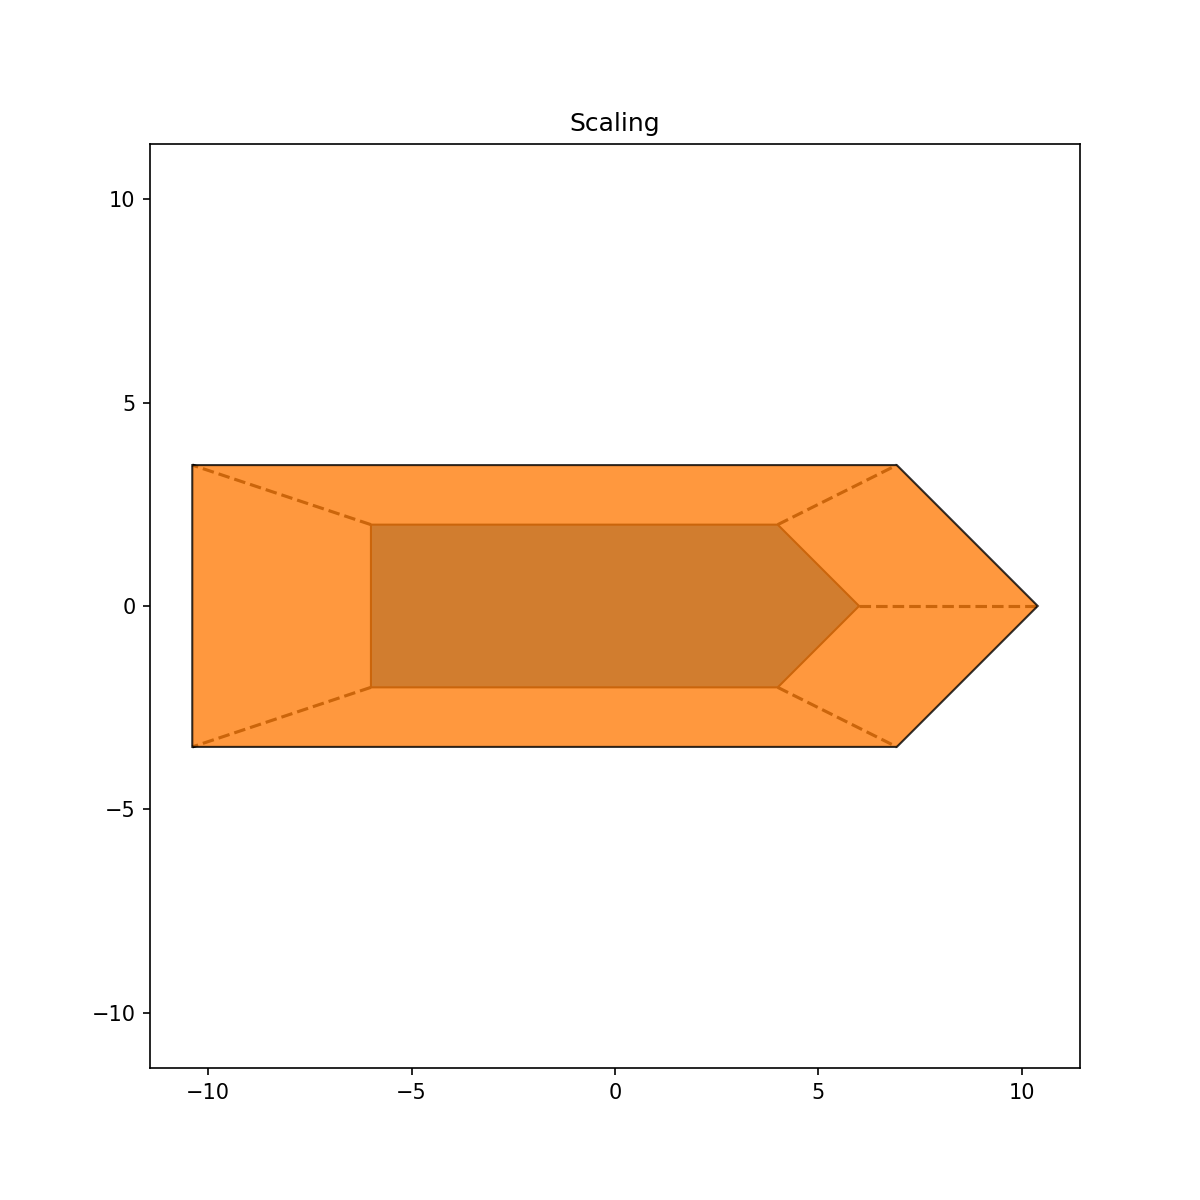

In [83]:
X = boat()
K = np.asarray([[3**.5,0],[0,3**.5]])
Xt = K@X
fg = plt.figure(figsize=(8, 8))
plottransform(X,Xt,'Scaling')
plt.show()

<a id='Simple_Elongation'></a>
### 4.1.4 Simple Elongation

A Simple Elongation or compression changes the scale along one coordinate axis only, and has a diagonal matrix in which all diagonal elements but one are $+1$. The remaining element, corresponding to the scale change axis, is either greater than one (for elongation), or less than one (for compression). The inverse of such a transform contains the reciprocal of the scale change in the same diagonal location. An example is:

$$_2E_2 = \begin{pmatrix} 1& 0 \\ 0 & 2 \end{pmatrix}\tag{155}$$ 

Transforming

$$\m{x} = \begin{pmatrix}4\\1\end{pmatrix}\tag{156}$$

by $\m{E}$ gives

$$\m{y} = \m{Ex}=\begin{pmatrix}4\\2\end{pmatrix}\tag{157}$$

<img align="left" width="30%" style="padding-right:10px;" src="Images/elongation.png">

<br><br>Elongating all vertices of the boat $\begin{pmatrix}-6\\-2\end{pmatrix}$,$\begin{pmatrix}4\\-2\end{pmatrix}$,$\begin{pmatrix}6\\0\end{pmatrix}$,$\begin{pmatrix}4\\2\end{pmatrix}$,$\begin{pmatrix}-6\\2\end{pmatrix}$ by $\m{E}$ produces the result shown in the figure to the left

___
#### 4.1.4 Self Study Exercise 1

Similar to how you reproduced the Scalar figure, reproduce the Elongation Transformation figure shown above 

    a) Create a matrix of vertices called `X` and assign it the vertices returned by `boat()`\
    b) Define the elongation matrix `E` according to (155)
    c) Transform `X` to `Xt` using the scaling defined by `E`
    d) create a 8x8 figure `fg` using the `plt.figure()` function 
    e) Plot `X` and its transform `Xt` with the title 'Elongation' using `plottransform()`
    f) Verify that your plot corresponds to the figure above
    

<IPython.core.display.Javascript object>


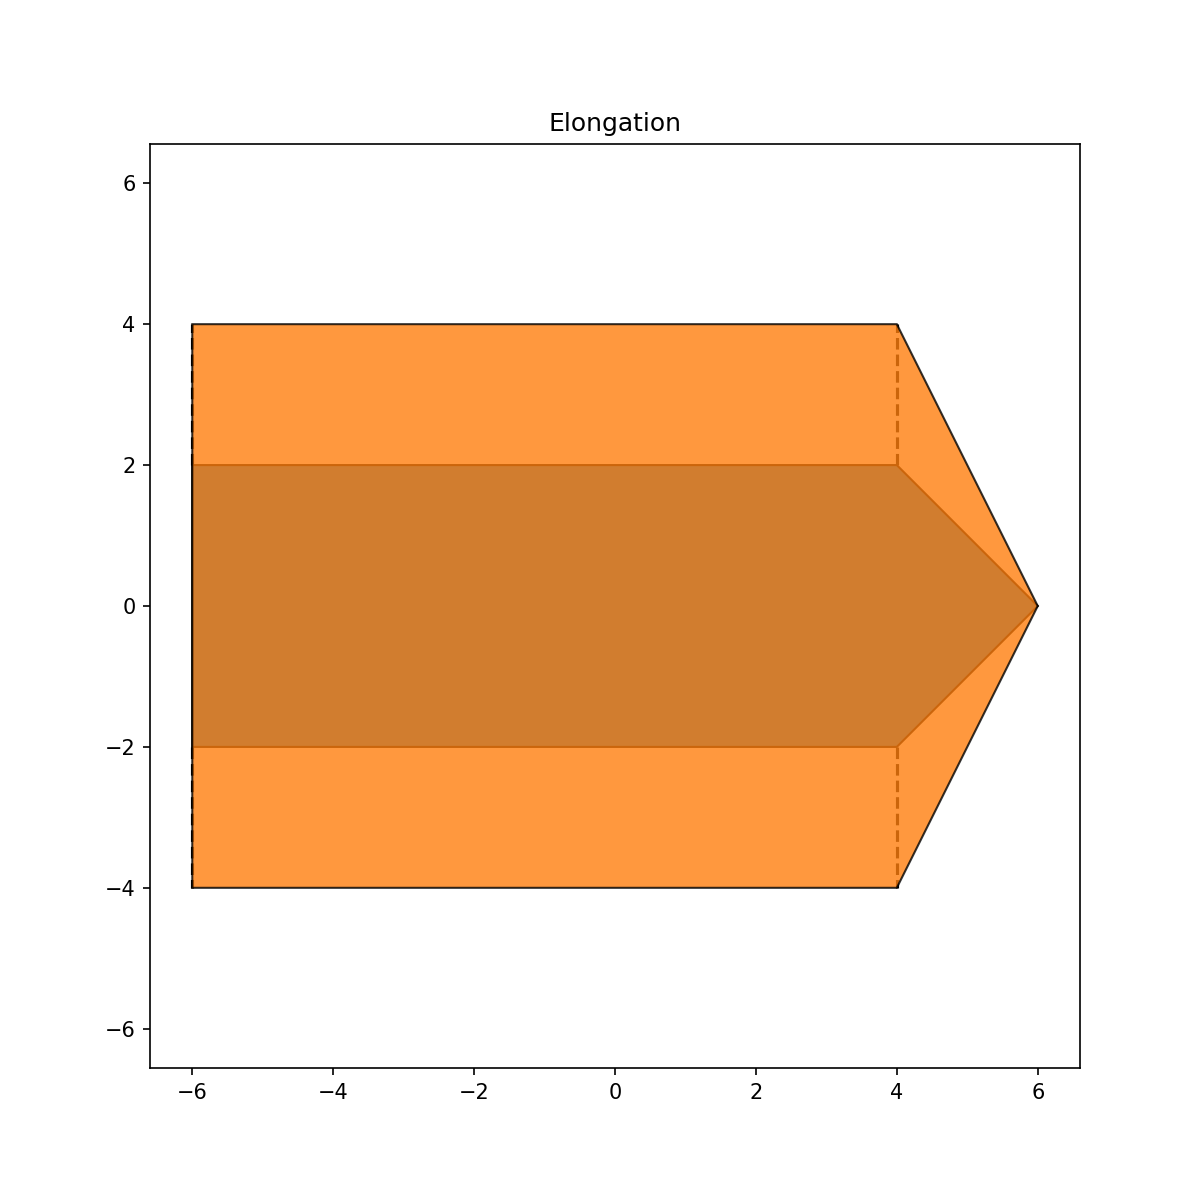

In [74]:
X = boat()
E = np.asarray([[1,0],[0,2]])
Xt = E@X
fg = plt.figure(figsize=(8, 8))
plottransform(X,Xt,'Elongation')
plt.show()


<a id='Simple_Elongation'></a>
### 4.1.5 Simple Elongation

A Simple Shear or compression involves shear along one coordinate axis only, and has a transformation matrix in which all diagonal elements are $+1$ and only one off-diagonal element is non-zero. The inverse of such a transform contains the negative of the off-diagonal component in the same location. An example is:

$$_2S_2 = \begin{pmatrix} 1& 3 \\ 0 & 1 \end{pmatrix}\tag{158}$$ 

Transforming

$$\m{x} = \begin{pmatrix}4\\1\end{pmatrix}\tag{159}$$

by $\m{S}$ gives

$$\m{y} = \m{Sx}=\begin{pmatrix}7\\1\end{pmatrix}\tag{160}$$

<img align="left" width="30%" style="padding-right:10px;" src="Images/shear.png">

<br><br>Shearing all vertices of the boat $\begin{pmatrix}-6\\-2\end{pmatrix}$,$\begin{pmatrix}4\\-2\end{pmatrix}$,$\begin{pmatrix}6\\0\end{pmatrix}$,$\begin{pmatrix}4\\2\end{pmatrix}$,$\begin{pmatrix}-6\\2\end{pmatrix}$ by $\m{S}$ produces the result shown in the figure to the left

___
#### 4.1.5 Self Study Exercise 1

Similar to how you reproduced the Elongation figure, reproduce the Shear Transformation figure shown above 

    a) Create a matrix of vertices called `X` and assign it the vertices returned by `boat()`\
    b) Define the shear matrix `S` according to (158)
    c) Transform `X` to `Xt` using the scaling defined by `S`
    d) create a 8x8 figure `fg` using the `plt.figure()` function 
    e) Plot `X` and its transform `Xt` with the title 'Elongation' using `plottransform()`
    f) Verify that your plot corresponds to the figure above
    g) Rotate the boat by 
    

<IPython.core.display.Javascript object>


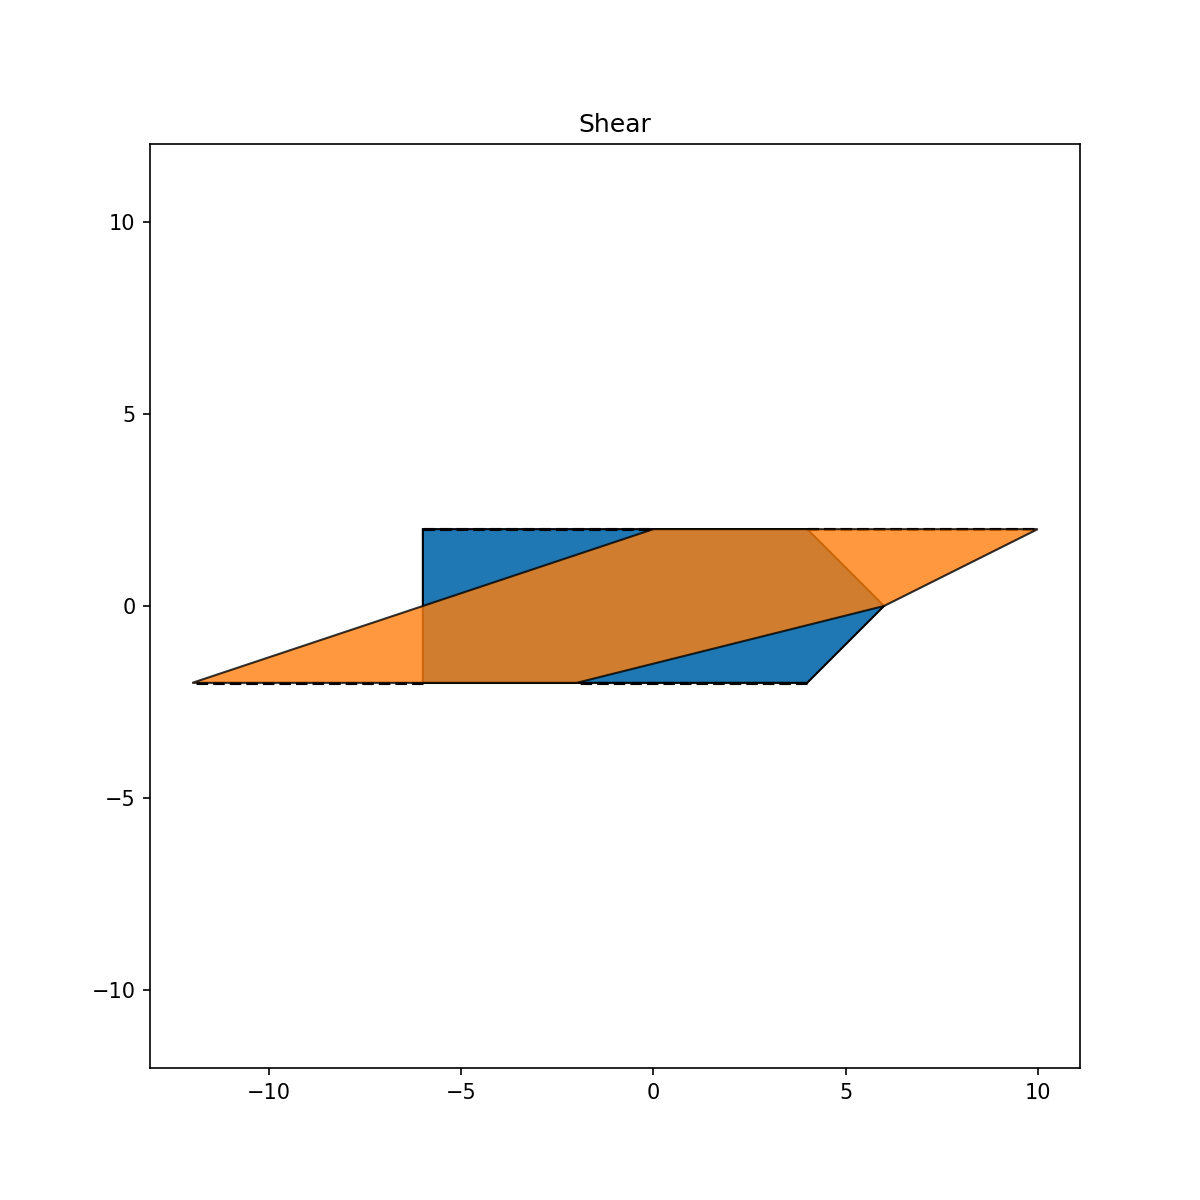

In [75]:
X = boat()
S = np.asarray([[1,3],[0,1]])
Xt = S@X
fg = plt.figure(figsize=(8, 8))
plottransform(X,Xt,'Shear')
plt.show()


___
<a id='Affine_properties'></a>
## 4.1.6 Special (Affine) Transformations: Properties and Examples

From the figures in 4.1.1 through 4.1.5 we see that

- Translations, rotations, and reflections preserve shape and size, but may change orientation. Such transformations are often referred to as ***rigid body*** transformations

- Translations, rotations, reflections and, scalar transformations preserve the shape (size of the angles) of the figure. Such transformations are called ***isogonal*** 

- All affine transformations transform parallel lines into parallel lines

Examples of general affine transformations are:

$$_2G_2 = \begin{pmatrix}-3&2\sqrt{3} \\ 2\sqrt{3} & -1\end{pmatrix}\tag{161}$$

and

$$_2H_2 = \begin{pmatrix}3&0 \\ 3\sqrt{3} & -2\end{pmatrix}\tag{162}$$

Each such affine transformations can be represented by sequences of elementary affine transformations, for example:

$$_2G_2 = \begin{pmatrix}3&0 \\ 0 & 3\end{pmatrix}
\begin{pmatrix}1& 0 \\ \dfrac{-2}{\sqrt{3}} & 1\end{pmatrix}
\begin{pmatrix}-1&0 \\ 0 & 1\end{pmatrix}
\begin{pmatrix}1&\dfrac{-2}{\sqrt{3}} \\ 0 & 1\end{pmatrix}\tag{163}$$

___
#### 4.1.6 Self Study Exercise 1

    a) Create an array `G` representing (161) and display is using `display_matrix()`
    b) Represent the elementary affine transformations of (161) by `A1`,`A2`,`A3` and,`A4`
    c) Calculate  and display the result of (161) using `A1`,`A2`,`A3` and,`A4`
    

In [92]:
G = np.array([[-3,2*sqrt(3)],[2*sqrt(3),-1]])
print('G:')
display_matrix(G)
A1 = np.array([[1,-2/sqrt(3)],[0,1]])
A2 = np.array([[-1,0],[0,1]])
A3 = np.array([[1,0],[-2/sqrt(3),1]])
A4 = np.array([[3,0],[0,3]])
print('A4@A3@A2@A1)')
display_matrix(A4@A3@A2@A1)


G


<IPython.core.display.Math object>

A4@A3@A2@A1)


<IPython.core.display.Math object>

___
#### 4.1.6 Self Study Exercise 2

    a) Create an array `H` representing (162) and display is using `display_matrix()`
    b) Find a sequence of n elementary affine transformations that represents the transformation `H`
    c) Create a sequence of matrices `Ai` (i = 1 through n) that represent the matrices from b)
    d) Calculate  and display the result of performing the sequence of transformations


In [103]:
H = np.array([[3,0],[3*sqrt(3),-2]])
print('H:')
display_matrix(H)

A1 = np.array([[1,0],[3/sqrt(3),1]])
A2 = np.array([[3,0],[0,3]])

display_matrix(A2@A1)

H:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<a id='Eiden'></a>
## 4.2 Eigenvalues and Eigenvectors of Symmetric Matrices

A problem which often arises concerning a linear transformation matrix $\m{C}$ is to find the vectors $\m{x}$ which will be changed in length but not in direction by $\m{C}$. Expressed in equation form, this problem is, given $\m{C}$, find $\lambda$ and $\m{x}$ such that:

<a id='eq164'></a>
$$\m{Cx} = \lambda\m{x}\tag{164}$$

Solutions may exist for any $\m{C}$, but this discussion is restricted to non-singular matrices $\m{C}$. We can rewrite [(164)](#eq164) as:

<a id='eq165'></a>
$$\left(\m{C}-\lambda \m{I}\right)\m{x} = \m{0}\tag{165}$$

which is a system of homogeneous equations. As shown in [3 Solution of Linear Equations](3_Solution_of_Linear_Equations.ipynb#Possible_Linear_Equation_Relationships) a non-trivial solution for $\m{x}$ exists only when the rank of $\left(\m{C}-\lambda \m{I}\right)$ is less than the dimension of $\m{x}$, that is when $\left(\m{C}-\lambda \m{I}\right)$ is singular or:

<a id='eq166'></a>
$$\text{det}\left(\m{C}-\lambda \m{I}\right)=0\tag{166}$$

This equation is called the ***characteristic equation*** of the matrix $\m{C}$ and serves to determine $n$ values of $\lambda$, where $n$ is the order of $\m{C}$. These values $\lambda$ are called the ***Eigenvalues*** (or *characteristic roots* or *latent roots*) of the matrix $\m{C}$. For symmetric matrices the Eigenvalues are always real numbers. For each Eigenvalue $\lambda_i$ there is a nonzero Eigenvector $\m{x}_i$ that satisfies [(165)](#eq165) called the ***Eigenvector*** (or *characteristic vector* or *latent vector*) of $\m{C}$ corresponding to Eigenvalue $\lambda_i$. For symmetric matrices the Eigenvectors corresponding to Eigenvalues with different values are orthogonal i.e.:

$$\m{x}_i\perp \m{x}_j\;\;\forall i\neq j\tag{167}$$

For non-singular matrices $\m{C}$, [(166)](#eq166) forces the rank of $\text{det}\left(\m{C}-\lambda \m{I}\right)$ to be exactly one less than the dimension of $\m{x}$ in [(165)](#eq165). In this case, as shown in [3 Solution of Linear Equations](3_Solution_of_Linear_Equations.ipynb#Possible_Linear_Equation_Relationships), $\m{x}$ is not uniquely determined, one element of $\m{x}$ must be (not-so) arbitrarily defined. We remove this arbitrary specification by specifying that the Eigenvectors $\m{x}$ each have a length of one, that is:

<a id='eq168'></a>
$$\m{x}^T\m{x} = 1\tag{168}$$

For each value $\lambda_i$ and its equivalent Eigenvector $\m{x_i}$, we have from [(164)](#eq164):

$$\m{Cx}_i=\lambda_i\m{x}_i \;\; \forall\;\; i\in[1\dots n]\tag{169}$$

We can then combine these $n$ equations into:

$$\m{CP} = \m{DP}\tag{170}$$

where $\m{P}$ is an $n\times n$ matrix whose columns are the normalized Eigenvectors $\m{x}_i$ and, $\m{D}$ is a diagonal matrix whose elements are the Eigenvalues $\lambda_i$. Because $\m{D}$ is diagonal each one of the Eigenvalues acts as a scalar multiplier on the corresponding Eigenvector in $\m{P}$, and since [scalar multiplication is commutative](2_Matrix_Algebra.ipynb#eq23) it follows that:

<a id='eq171'></a>
$$\m{CP} = \m{PD}\tag{171}$$

Because the normalized Eigenvectors are orthogonal $\m{P}$ is an orthogonal matrix, so that:


$$\m{P}^{-1} = \m{P}^T\tag{172}$$

combining with [(171)](#eq171):

<a id='eq173'></a>
$$\m{P}^T\m{CP} = \m{D}\tag{173}$$

We interpret [(173)](#eq173) by stating that every nonsingular symmetric matrix $\m{C}$ is ***orthogonally similar*** to a diagonal matrix $\m{D}$ made up of the Eigenvalues of $\m{C}$.,and the ***similarity transformation*** matrix $\m{P}$ is made up of column vectors that are the Eigenvectors of $\m{C}$.

For example, the symmetric matrix:

$$\begin{pmatrix}5&3 \\ 3&5\end{pmatrix}\tag{174}$$

has the characteristic equation:

$$\text{det}\left(\m{C}-\lambda \m{I}\right)=\text{det}\begin{pmatrix}(5-\lambda)&3 \\ 3&(5-\lambda)\end{pmatrix} = (5-\lambda)^2-9 = 0\tag{175}$$

or:

$$\lambda^2-10\lambda+16 = 0\tag{176}$$

which has solutions $\lambda_1 = 8$ and $\lambda_2 = 2$ i.e., the Eigenvalues of this $\m{C}$ are 8 and 2. for $\lambda_1 = 8$ the Eigenvector $\m{x}_1$ is found from [(165)](#eq165):

$$\left(\m{C}-\lambda_1 \m{I}\right)\m{x}_1 = \left[ \begin{pmatrix} 5&3 \\ 3&5 \end{pmatrix}-\begin{pmatrix}8 &0 \\ 0&8 \end{pmatrix} \right]\begin{pmatrix}x_1 \\ x_2 \end{pmatrix}=\begin{pmatrix}-3 & 3 \\ 3&-3 \end{pmatrix}\begin{pmatrix}x_1 \\ x_2 \end{pmatrix}=0\tag{177}$$

we enforce [(168)](#eq168) and combine with [(177)](#eq177):

$$\left.\begin{array}. \m{x}^T\m{x}&=&1 \\ x_1&=&x_2\end{array}\right\}\Rightarrow \m{x} = \begin{pmatrix}\dfrac{1}{2}\sqrt{2} \\ \dfrac{1}{2}\sqrt{2} \end{pmatrix}$$ 


___
#### Copyright 2022, Semme J. Dijkstra

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.